In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import metrics_summary as ms

In [12]:
np.random.seed(170)

In [13]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").values.ravel()
y_test = pd.read_csv("data/y_test.csv").values.ravel()

## SMOTE

In [14]:
# implement SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_os, y_os = os.fit_resample(X_train, y_train)
print(X_os.shape, y_os.shape)

(236780, 246) (236780,)


## Stochastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="log")
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(sgd, X_train, y_train)

[[48396  2342]
 [ 4884  1115]]
Kappa Score: 0.17180124438459532
Accuracy Score: 0.8726404286444472
Precision: 0.3225339890078102
Recall: 0.18586431071845308
F1 Score: 0.23582910321489
AUC Score: 0.5698528065476849
Average Accuracy Score: 0.8299891139107825
Average Precision Score: 0.2949095219207642
Average Recall Score: 0.22636454345939874
Average F1 Score: 0.8299891139107825
[0.89115492 0.88937568 0.88956453 0.61687502 0.86297541]
Average AUC Score: 0.7037643918208902
[0.6663102  0.69035642 0.67954761 0.74569799 0.73690974]


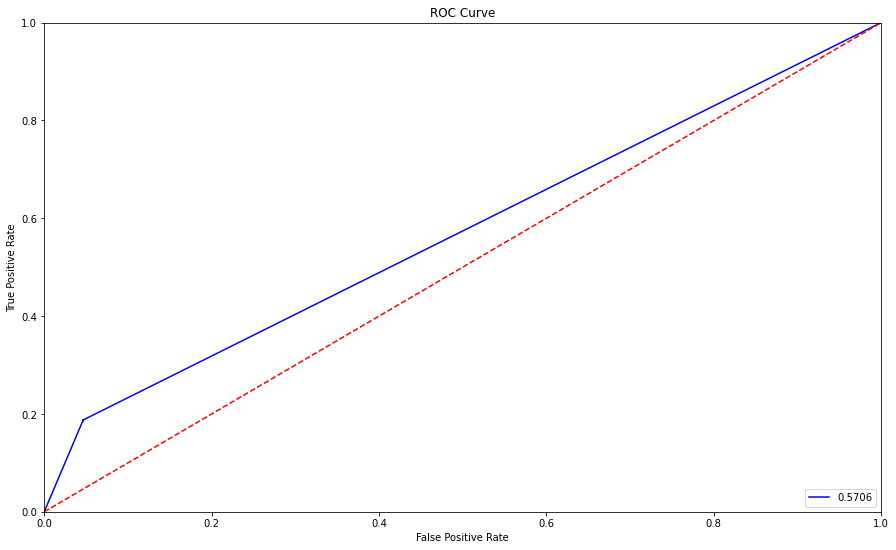

In [16]:
from sklearn.metrics import roc_curve, auc

probs = sgd.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label=f'{roc_auc:0.4f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
sgd_cs = SGDClassifier(loss="log", class_weight="balanced")
sgd_cs.fit(X_train, y_train)
y_pred = sgd_cs.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(sgd_cs, X_train, y_train)

[[49037  1701]
 [ 5322   677]]
Kappa Score: 0.10809212363910603
Accuracy Score: 0.8762183407652855
Precision: 0.28469301934398655
Recall: 0.11285214202367061
F1 Score: 0.1616330428554375
AUC Score: 0.5396634867554594
Average Accuracy Score: 0.6511628368737293
Average Precision Score: 0.23081434978227217
Average Recall Score: 0.5117246465574439
Average F1 Score: 0.6511628368737293
[0.80784047 0.88303055 0.85360879 0.6022208  0.10911357]
Average AUC Score: 0.6809224714741164
[0.71553752 0.70485815 0.71564388 0.73792165 0.53065116]


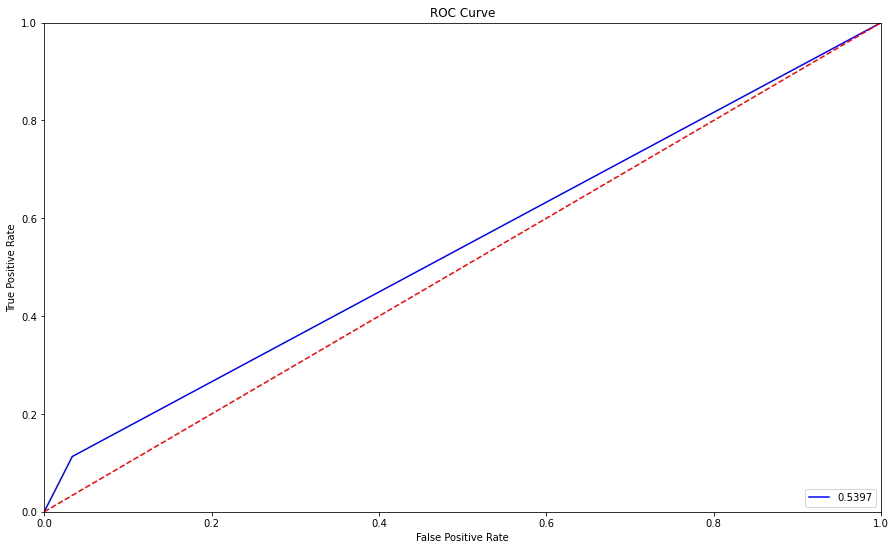

In [18]:
from sklearn.metrics import roc_curve, auc

probs = sgd_cs.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label=f'{roc_auc:0.4f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Stochastic Gradient Descent Using SMOTE

In [19]:
sgd_os = SGDClassifier(loss="log")
sgd_os.fit(X_os, y_os)
y_pred = sgd_os.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(sgd_os, X_os, y_os)

[[49348  1390]
 [ 5423   576]]
Kappa Score: 0.09752696018137397
Accuracy Score: 0.8799196291661526
Precision: 0.29298067141403866
Recall: 0.09601600266711119
F1 Score: 0.14463276836158193
AUC Score: 0.5343101811593272
Average Accuracy Score: 0.650481459582735
Average Precision Score: 0.7261452408055125
Average Recall Score: 0.5395134724216571
Average F1 Score: 0.650481459582735
[0.60953206 0.57390827 0.71513641 0.70267759 0.65115297]
Average AUC Score: 0.7651253970042263
[0.75159866 0.74106002 0.78253898 0.78008962 0.77033971]


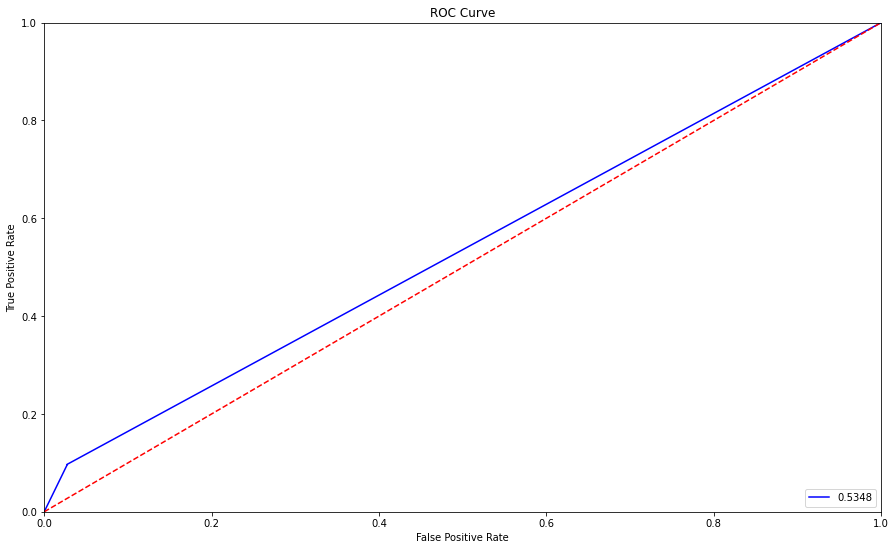

In [20]:
from sklearn.metrics import roc_curve, auc

probs = sgd_os.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label=f'{roc_auc:0.4f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()